# Compare online e3w and e3w infered from gdept field computed off-line using the SSH 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
DATAMSH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/GRID/'
msh_file='CREG025.L75-NEMO420_mesh_mask_4XR.nc'
ds_msh=xr.open_dataset(DATAMSH+msh_file,decode_coords=True)
ds_msh

<xarray.Dataset>
Dimensions:       (time_counter: 1, yyy: 603, xxx: 528, nav_lev: 75)
Coordinates:
  * nav_lev       (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: yyy, xxx
Data variables: (12/40)
    e1f           (time_counter, yyy, xxx) float64 ...
    e1t           (time_counter, yyy, xxx) float64 ...
    e1u           (time_counter, yyy, xxx) float64 ...
    e1v           (time_counter, yyy, xxx) float64 ...
    e2f           (time_counter, yyy, xxx) float64 ...
    e2t           (time_counter, yyy, xxx) float64 ...
    ...            ...
    tmask         (time_counter, nav_lev, yyy, xxx) int8 ...
    tmaskutil     (time_counter, yyy, xxx) int8 ...
    umask         (time_counter, nav_lev, yyy, xxx) int8 ...
    umaskutil     (time_counter, yyy, xxx) int8 ...
    vmask         (time_counter, nav_lev, yyy, xxx) int8 ...
    vmaskutil     (time_counter, yyy, xxx) int8 ...
Attributes:
    CfgName:    UNKNOWN
    CfgIndex:   -999
    Iperio:     0
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zps
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  24/10/2022 15:19:54 -0000
    NCO:        netCDF Operators version 5.1.3 (Homepage = http://nco.sf.net,...
    history:    Wed Dec 13 11:00:38 2023: ncks -x -v x,y CREG025.L75-NEMO420_...

In [3]:
ds_msh=ds_msh.rename_dims({'xxx':'x','yyy':'y'})

In [4]:
ds_msh

<xarray.Dataset>
Dimensions:       (time_counter: 1, y: 603, x: 528, nav_lev: 75)
Coordinates:
  * nav_lev       (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/40)
    e1f           (time_counter, y, x) float64 ...
    e1t           (time_counter, y, x) float64 ...
    e1u           (time_counter, y, x) float64 ...
    e1v           (time_counter, y, x) float64 ...
    e2f           (time_counter, y, x) float64 ...
    e2t           (time_counter, y, x) float64 ...
    ...            ...
    tmask         (time_counter, nav_lev, y, x) int8 ...
    tmaskutil     (time_counter, y, x) int8 ...
    umask         (time_counter, nav_lev, y, x) int8 ...
    umaskutil     (time_counter, y, x) int8 ...
    vmask         (time_counter, nav_lev, y, x) int8 ...
    vmaskutil     (time_counter, y, x) int8 ...
Attributes:
    CfgName:    UNKNOWN
    CfgIndex:   -999
    Iperio:     0
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zps
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  24/10/2022 15:19:54 -0000
    NCO:        netCDF Operators version 5.1.3 (Homepage = http://nco.sf.net,...
    history:    Wed Dec 13 11:00:38 2023: ncks -x -v x,y CREG025.L75-NEMO420_...

# Read 12-months of monthly mean input data 

In [5]:
INDIR='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420ZZZ-MEAN/1m/2020/E3W-SCALE/'

In [6]:
ds_W=xr.open_mfdataset(INDIR+'CREG025.L75-NEMO420ZZZ_y2020m*.1m_gridW.nc')
ds_W

<xarray.Dataset>
Dimensions:               (y: 603, x: 528, depthw: 75, time_counter: 12,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(603, 528), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(603, 528), meta=np.ndarray>
  * depthw                (depthw) float32 0.0 1.024 2.103 ... 5.596e+03 5.8e+03
    time_centered         (time_counter) object dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) object 2020-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    depthw_bounds         (time_counter, depthw, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    vovecrtz              (time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    votkeavt              (time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    e3w                   (time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    logavt                (time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
Attributes:
    name:              /home1/scratch/ctalandi/CREG025.L75-NEMO420ZZZ-XIOS.42...
    description:       ocean W grid variables
    title:             ocean W grid variables
    Conventions:       CF-1.6
    timeStamp:         2023-Nov-30 14:13:28 GMT
    uuid:              93f1e045-d752-49dc-a02a-d0113bc6118f
    start_date:        19790101
    output_frequency:  1mo
    CONFIG:            CREG025.L75
    CASE:              NEMO420ZZZ

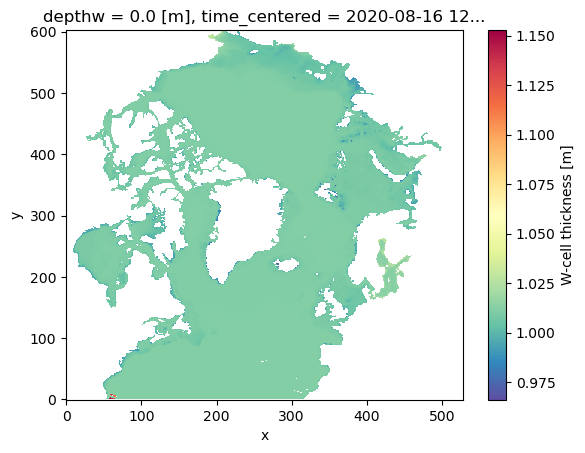

In [7]:
ds_W.e3w.sel(time_counter='2020-08',depthw=0).plot(cmap='Spectral_r')

In [8]:
ds_ssh=xr.open_mfdataset(INDIR+'CREG025.L75-NEMO420ZZZ_y2020m*.1m_gridT.nc')
ds_ssh

<xarray.Dataset>
Dimensions:               (y: 603, x: 528, deptht: 75, time_counter: 12,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(603, 528), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(603, 528), meta=np.ndarray>
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) object dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) object 2020-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    ssh                   (time_counter, y, x) float32 dask.array<chunksize=(1, 603, 528), meta=np.ndarray>
    mldkz5                (time_counter, y, x) float32 dask.array<chunksize=(1, 603, 528), meta=np.ndarray>
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(1, 603, 528), meta=np.ndarray>
    rhop_sig0             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 603, 528), meta=np.ndarray>
    botpres               (time_counter, y, x) float32 dask.array<chunksize=(1, 603, 528), meta=np.ndarray>
Attributes:
    name:              /home1/scratch/ctalandi/CREG025.L75-NEMO420ZZZ-XIOS.42...
    description:       ocean T grid variables
    title:             ocean T grid variables
    Conventions:       CF-1.6
    timeStamp:         2023-Nov-30 14:13:24 GMT
    uuid:              f8d4ce90-d546-42a6-9061-5de1088febf6
    start_date:        19790101
    output_frequency:  1mo
    CONFIG:            CREG025.L75
    CASE:              NEMO420ZZZ

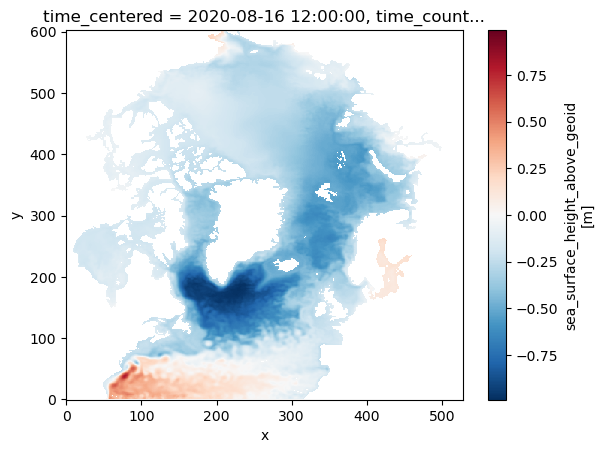

In [9]:
ds_ssh.ssh.sel(time_counter='2020-08').plot()

# Start to compute the required fields for the off-line version

In [10]:
# The following fomulation are defined in the domzgr_substitute.h90 module under the key_qco cpp key 
# Only the lines of interest are kept here (extracted from the NEMO release 4.2.0)

#   define  e3t(i,j,k,t)   (e3t_0(i,j,k)*(1._wp+r3t(i,j,t)*tmask(i,j,k)))
#   define  e3w(i,j,k,t)   (e3w_0(i,j,k)*(1._wp+r3t(i,j,t)))
#   define  ht(i,j)        (ht_0(i,j)*(1._wp+r3t(i,j,Kmm)))
#   define  hu(i,j,t)      (hu_0(i,j)*(1._wp+r3u(i,j,t)))
#   define  hv(i,j,t)      (hv_0(i,j)*(1._wp+r3v(i,j,t)))
#   define  r1_hu(i,j,t)   (r1_hu_0(i,j)/(1._wp+r3u(i,j,t)))
#   define  r1_hv(i,j,t)   (r1_hv_0(i,j)/(1._wp+r3v(i,j,t)))

#   define  gdept(i,j,k,t) (gdept_0(i,j,k)*(1._wp+r3t(i,j,t)))
#   define  gdepw(i,j,k,t) (gdepw_0(i,j,k)*(1._wp+r3t(i,j,t)))

# & with r3t defined every time step based on the current SSH in the domqco.F90 module: 

#domqco.F90:      CALL dom_qco_r3c( ssh(:,:,Kmm), r3t(:,:,Kmm), r3u(:,:,Kmm), r3v(:,:,Kmm)           )
#domqco.F90:      SUBROUTINE dom_qco_r3c( pssh, pr3t, pr3u, pr3v, pr3f )

# pr3t(ji,jj) = pssh(ji,jj) * r1_ht_0(ji,jj)   !==  ratio at t-point  ==!

# With also the definition of r1_ht_0:
#domain.F90:      r1_ht_0(:,:) = ssmask (:,:) / ( ht_0(:,:) + 1._wp -  ssmask (:,:) )
#domain.F90:      ht_0(:,:) = 0._wp  ! Reference ocean thickness
#domain.F90:      ht_0(:,:) = ht_0(:,:) + e3t_0(:,:,jk) * tmask(:,:,jk)


In [11]:
ht_0 = (ds_msh['e3t_0'][0,:,:,:]*ds_msh['tmask'][0,:,:,:]).sum(dim=('nav_lev'))
r1_ht_0 = ds_msh['tmask'][0,0,:,:]/(ht_0+1.- ds_msh['tmask'][0,0,:,:])

In [12]:
r3t = ds_ssh['ssh'] * r1_ht_0[:,:]
r3t.shape

(12, 603, 528)

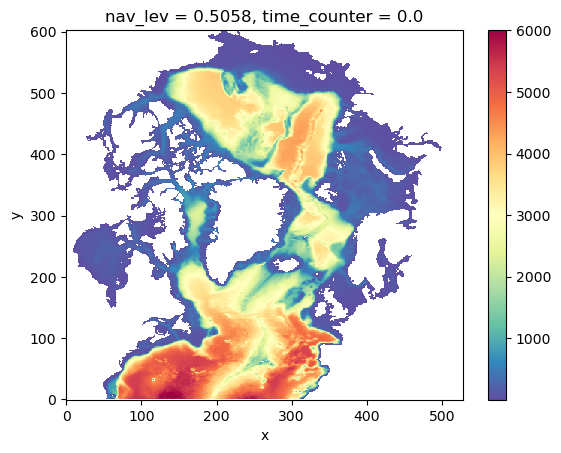

In [13]:
xr.where(ds_msh['tmask'][0,0,:,:]==1,ht_0,np.nan).plot(cmap=('Spectral_r'))

# Infer [TW]-points depths as the e3t & e3w scale factors as well

In [14]:
gdept_off= ds_msh['gdept_0'][0,:,:,:]*(1. + r3t)*ds_msh['tmask'][0,:,:,:]
gdepw_off= ds_msh['gdepw_0'][0,:,:,:]*(1. + r3t)*ds_msh['tmask'][0,:,:,:]

In [15]:
e3t_off= ds_msh['e3t_0'][0,:,:,:]*(1. + r3t)*ds_msh['tmask'][0,:,:,:]
e3w_off= ds_msh['e3w_0'][0,:,:,:]*(1. + r3t)

In [16]:
e3t_off=e3t_off.rename({'nav_lev':'deptht'})
e3w_off=e3w_off.rename({'nav_lev':'depthw'})

# Plot the 12-months evolution of gdept differences with the initial depth profile gdept_0

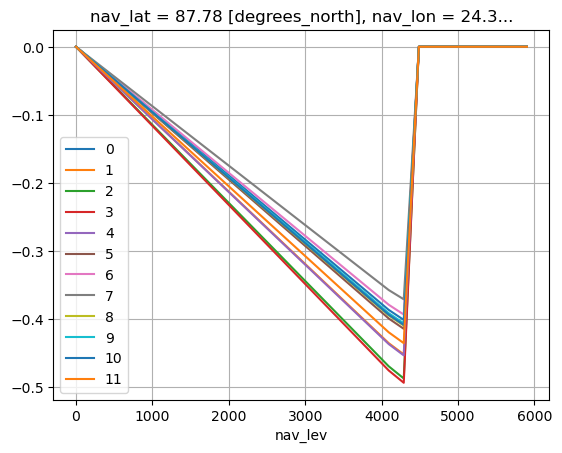

In [17]:
for lti in np.arange(12): 
    (gdept_off.isel(x=300,y=400,time_counter=lti)-(ds_msh['gdept_0']*ds_msh['tmask'][0,:,:,:]).isel(x=300,y=400,time_counter=0)).plot(label=str(lti))

plt.grid(True)
plt.legend()
#plt.ylim([0.,8.])
#plt.xlim([0.,50.])

# Re-compute the T-point depth & a specific location to control the previous calculation

In [18]:
%%time 

# Use a loop "by security" 
j=400 ; i=300
gdeptX=np.empty((12,75))
for time in np.arange(12): 
    print('month:', time)
    for jk in np.arange(75):
        gdeptX[time,jk] = ds_msh['gdept_0'][0,jk,j,i]*(1. + r3t[time,j,i])*ds_msh['tmask'][0,jk,j,i]

month: 0
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
CPU times: user 9.1 s, sys: 100 ms, total: 9.2 s
Wall time: 9.22 s


# Plot the evolution against the initial depth profile gdept_0

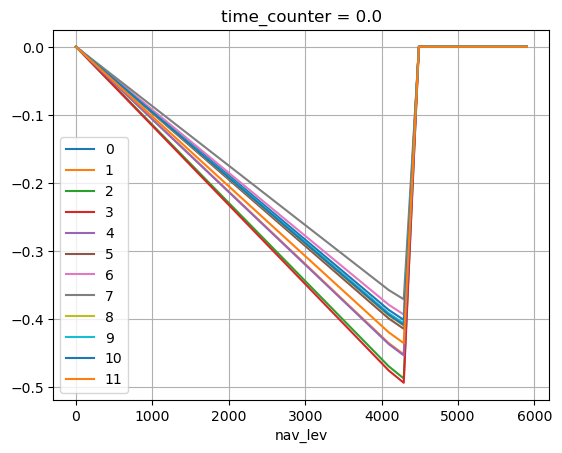

In [19]:
for lti in np.arange(12): 
    (gdeptX[lti,:]-(ds_msh['gdept_0'][0,:,j,i]*ds_msh['tmask'][0,:,j,i])).plot(label=str(lti))

plt.grid(True)
plt.legend()
#plt.ylim([0.,8.])
#plt.xlim([0.,50.])

# Plot the differences as well

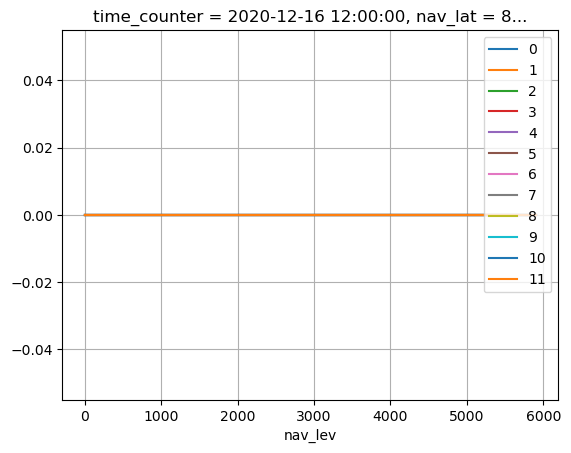

In [20]:
for lti in np.arange(12): 
    (gdept_off.isel(x=300,y=400,time_counter=lti)-gdeptX[lti,:]).plot(label=str(lti))

plt.grid(True)
plt.legend()


# Plot @ a given month e3[tw] computed off and on-line as the differences as well

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 75.0)

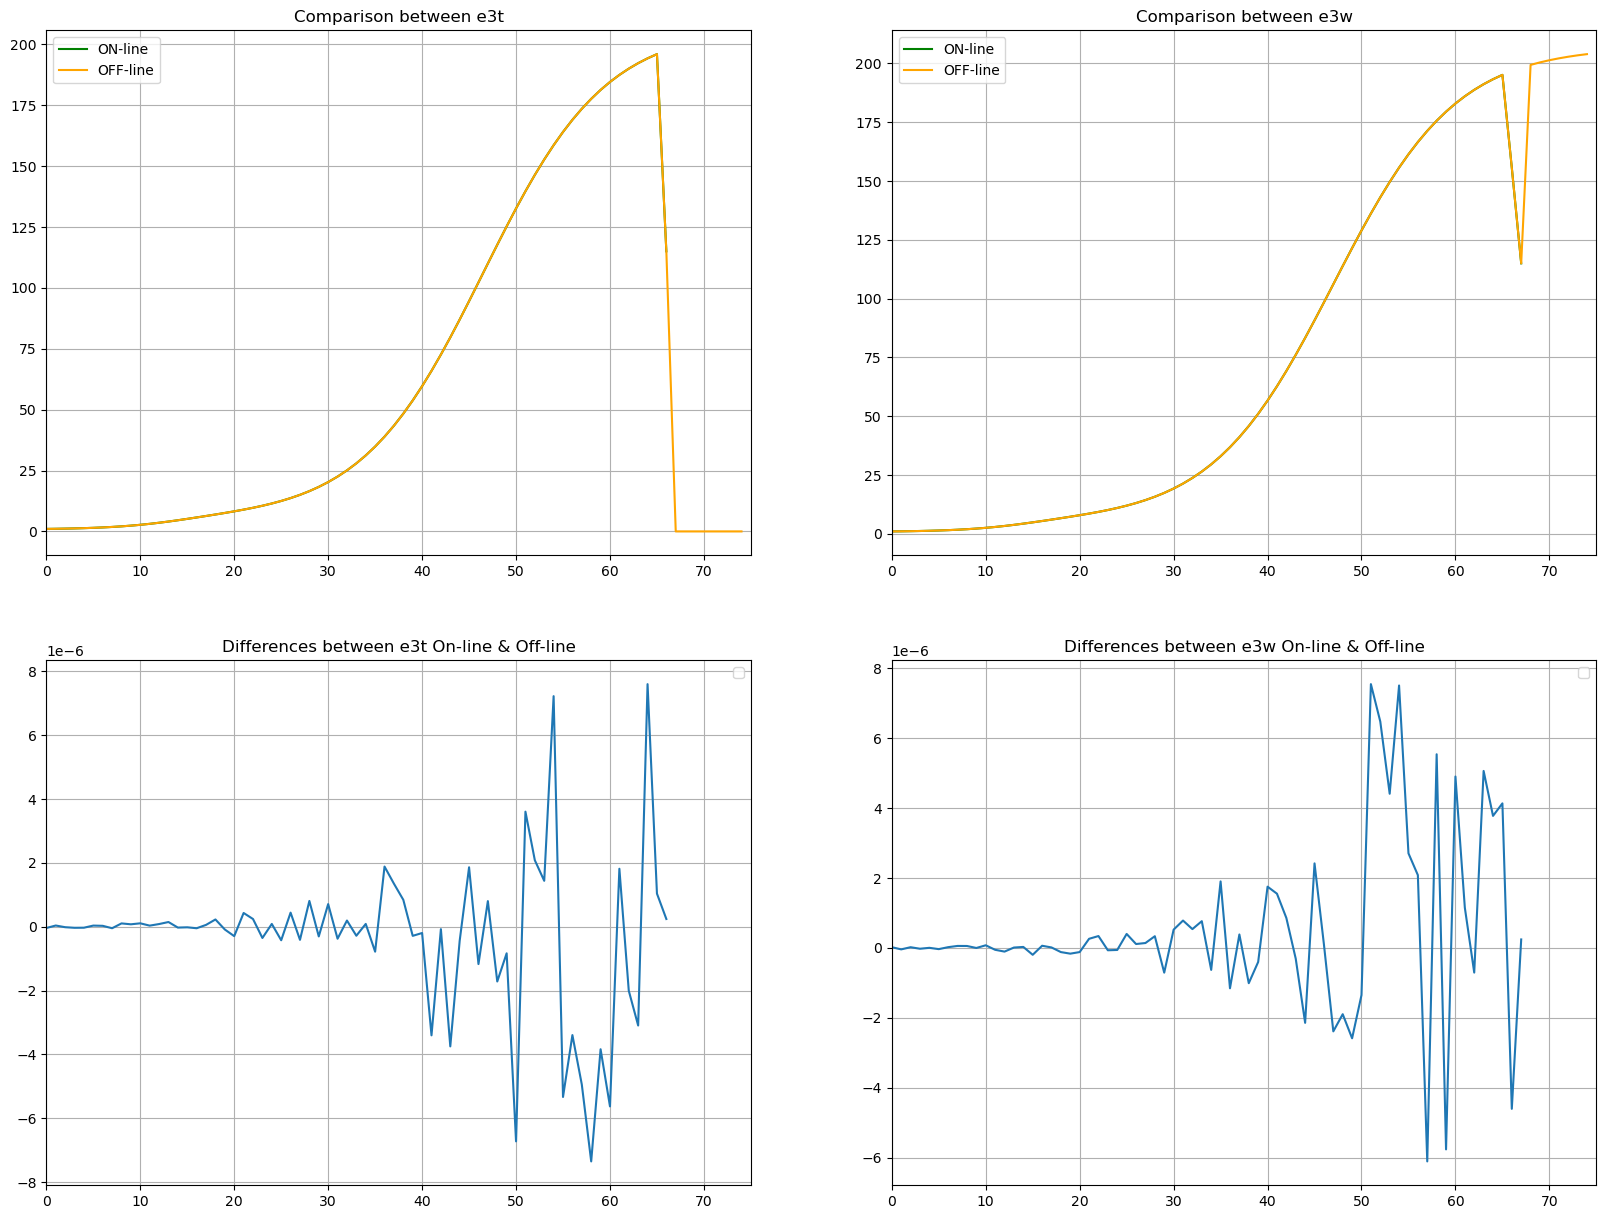

In [21]:
plt.figure(figsize=(20,15))

j=400 ; i=300

# E3T calculation 
plt.subplot(221)
for lti in np.arange(1)+11: 
    plt.plot(ds_ssh.e3t.isel(x=i,y=j,time_counter=lti),label='ON-line',color='green')
    plt.plot(e3t_off.isel(x=i,y=j,time_counter=lti),label='OFF-line',color='orange')

plt.title('Comparison between e3t')
plt.grid(True)
plt.legend()
plt.xlim([0.,75.])

# E3W calculation 
plt.subplot(222)
for lti in np.arange(1)+11: 
    plt.plot(ds_W.e3w.isel(x=i,y=j,time_counter=lti),label='ON-line',color='green')
    plt.plot(e3w_off.isel(x=i,y=j,time_counter=lti),label='OFF-line',color='orange')

plt.title('Comparison between e3w')
plt.grid(True)
plt.legend()
plt.xlim([0.,75.])

# E3T differences
plt.subplot(223)
#for lti in np.arange(1)+11: 
lti=11
plt.plot(ds_ssh.e3t[lti,:,j,i]-e3t_off[:,j,i,lti])

plt.title('Differences between e3t On-line & Off-line')
plt.grid(True)
plt.legend()
plt.xlim([0.,75.])

# E3W differences 
plt.subplot(224)
for lti in np.arange(1)+11: 
#    plt.plot(ds_W.e3w[lti,:,j,i].values-e3w_off[:,j,i,lti].values)

    plt.plot(ds_W.e3w.isel(x=i,y=j,time_counter=lti).values-e3w_off.isel(x=i,y=j,time_counter=lti).values)

plt.title('Differences between e3w On-line & Off-line')
plt.grid(True)
plt.legend()
plt.xlim([0.,75.])


# Can we infer the e3w scale factor using the offline reconstructed gdept ?  
# Well not really I did got the true reason for that, have a look at the plots below 

In [22]:
%%time 
j=400 ; i=300
e3wX=np.zeros((12,75))
for time in np.arange(12): 
    print('month:', time)
    for jk in np.arange(73)+1:
        e3wX[time,jk] = gdeptX[time,jk+1]-gdeptX[time,jk]

month: 0
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.58 ms


# Can we infer the e3t scale factor using the offline reconstructed gdeptw ?  
# Yes it works fine !!!!!


In [23]:
%%time 
j=400 ; i=300
e3tX=np.zeros((12,75))
for time in np.arange(12): 
    print('month:', time)
    for jk in np.arange(74):
        e3tX[time,jk] = (gdepw_off.isel(x=i,y=j,time_counter=time,nav_lev=jk+1)-\
                        gdepw_off.isel(x=i,y=j,time_counter=time,nav_lev=jk))*ds_msh['tmask'][0,jk,j,i]

month: 0
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
CPU times: user 1min 8s, sys: 1min 7s, total: 2min 15s
Wall time: 2min 15s


# Now plot 

(-10.0, 10.0)

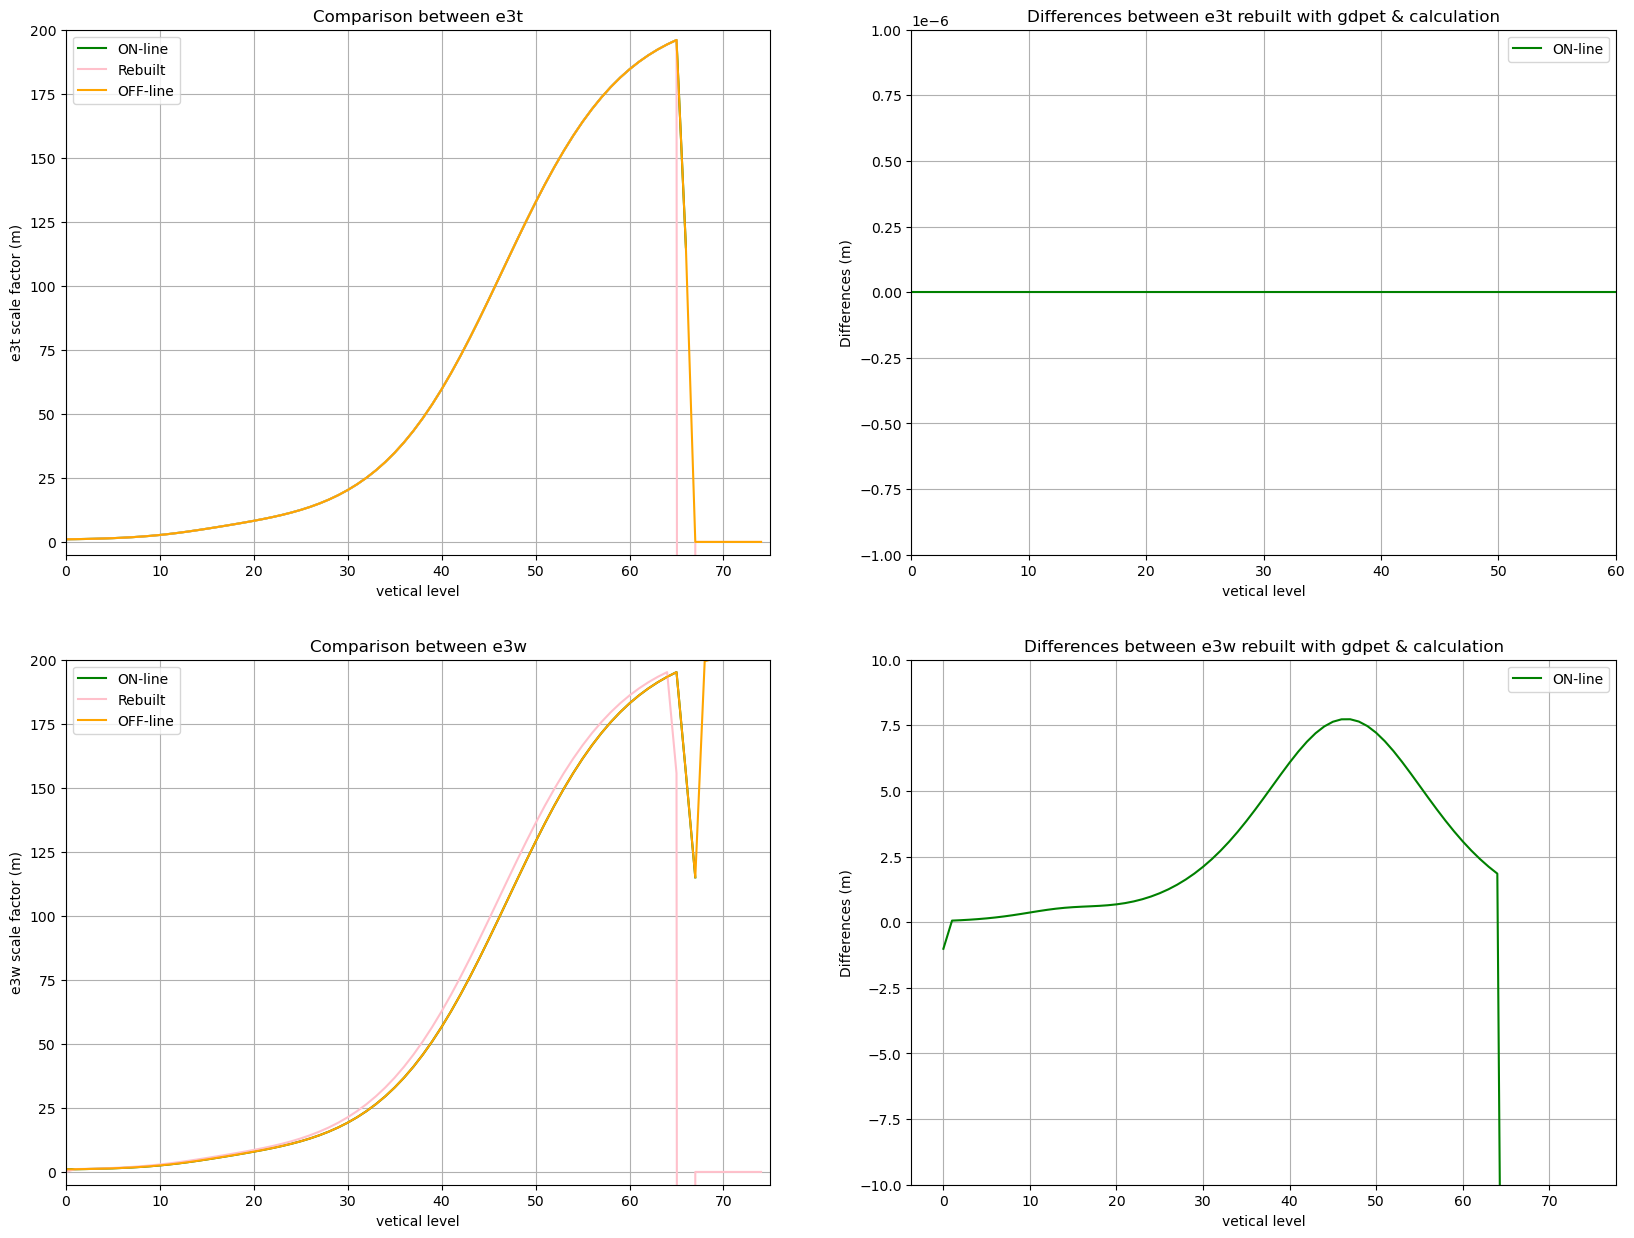

In [38]:
plt.figure(figsize=(20,15))

j=400 ; i=300
# E3T calculation 
plt.subplot(221)
for lti in np.arange(1)+11: 
    plt.plot(ds_ssh.e3t.isel(x=i,y=j,time_counter=lti),label='ON-line',color='green')
    plt.plot(np.arange(75),e3tX[lti,:],label='Rebuilt',color='pink')
    plt.plot(e3t_off.isel(x=i,y=j,time_counter=lti),label='OFF-line',color='orange')

plt.title('Comparison between e3t')
plt.grid(True)
plt.legend()
plt.xlabel('vetical level')
plt.ylabel('e3t scale factor (m)')
plt.xlim([0.,75.])
plt.ylim([-5.,200.])

# E3T differences 
plt.subplot(222)
for lti in np.arange(1)+11: 
    plt.plot(e3tX[lti,:]-e3t_off.isel(x=i,y=j,time_counter=lti),label='ON-line',color='green')
    
    
plt.title('Differences between e3t rebuilt with gdpet & calculation')
plt.grid(True)
plt.xlabel('vetical level')
plt.ylabel('Differences (m)')
plt.legend()
plt.xlim([0.,60.])
plt.ylim([-1e-6,1e-6])


j=400 ; i=300
# E3W calculation 
plt.subplot(223)
for lti in np.arange(1)+11: 
    plt.plot(ds_W.e3w.isel(x=i,y=j,time_counter=lti),label='ON-line',color='green')
    plt.plot(np.arange(75),e3wX[lti,:],label='Rebuilt',color='pink')
    plt.plot(e3w_off.isel(x=i,y=j,time_counter=lti),label='OFF-line',color='orange')

plt.title('Comparison between e3w')
plt.grid(True)
plt.legend()
plt.xlabel('vetical level')
plt.ylabel('e3w scale factor (m)')
plt.xlim([0.,75.])
plt.ylim([-5.,200.])

# E3W differences 
plt.subplot(224)
for lti in np.arange(1)+11: 
    plt.plot(e3wX[lti,:]-e3w_off.isel(x=i,y=j,time_counter=lti),label='ON-line',color='green')
    
    
plt.title('Differences between e3w rebuilt with gdpet & calculation')
plt.grid(True)
plt.xlabel('vetical level')
plt.ylabel('Differences (m)')
plt.legend()
#plt.xlim([0.,60.])
plt.ylim([-10.,10.])
#plt.ylim([-1e-6,1e-6])


